# Supervised Learning - Project

In this Project, we are going to perform a full supervised learning machine learning project on a "Diabetes" dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. 

[Kaggle Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

# Part I : EDA - Exploratory Data Analysis

For this task, you are required to conduct an exploratory data analysis on the diabetes dataset. You have the freedom to choose the visualizations you want to use, but your analysis should cover the following tasks mostly:

- Are there any missing values in the dataset?
- How are the predictor variables related to the outcome variable?
- What is the correlation between the predictor variables?
- What is the distribution of each predictor variable?
- Are there any outliers in the predictor variables?
- How are the predictor variables related to each other?
- Is there any interaction effect between the predictor variables?
- What is the average age of the individuals in the dataset?
- What is the average glucose level for individuals with diabetes and without diabetes?
- What is the average BMI for individuals with diabetes and without diabetes?
- How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?
- Are there any differences in the predictor variables between males and females (if gender information is available)?

In [2]:
# Import Libraries

import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline


In [49]:
# Import csv file and display the first few lines

df = pd.read_csv('diabetes.csv')
print(df.shape)
df.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# Are there any missing values in the dataset?

df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [26]:
# What is the correlation between the predictor variables? 
# CORRELATION MATRIX

correlation_matrix = df.corr()
correlation_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


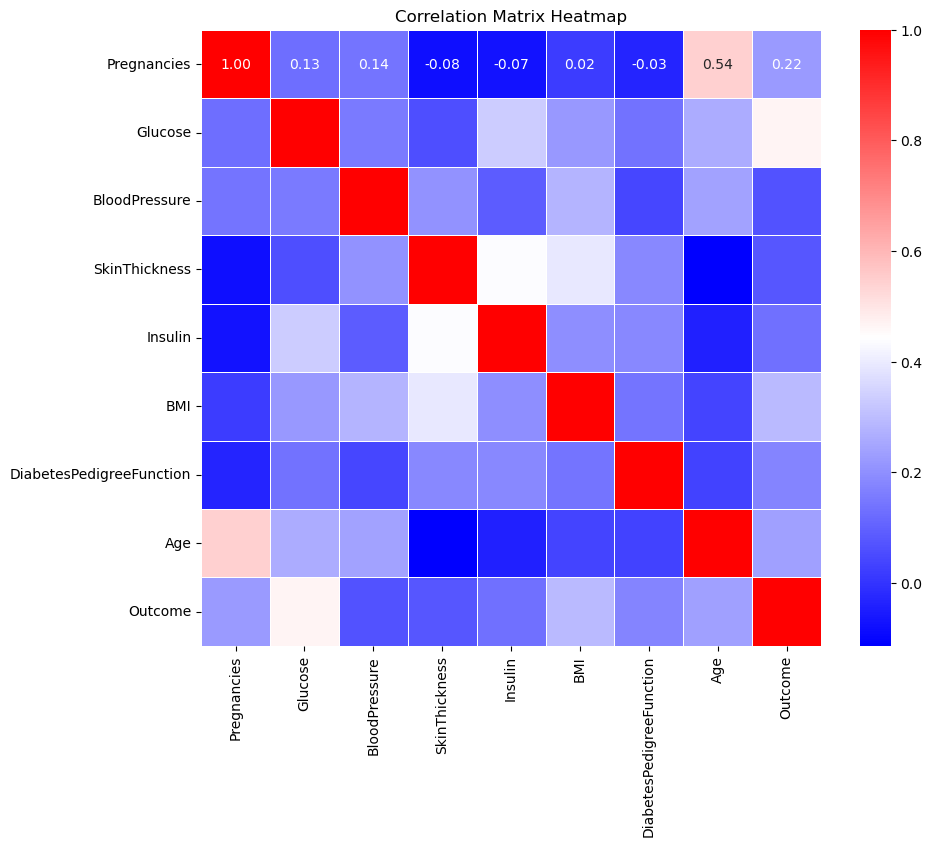

In [32]:
# What is the correlation between the predictor variables? 
# HEATMAP

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='bwr', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

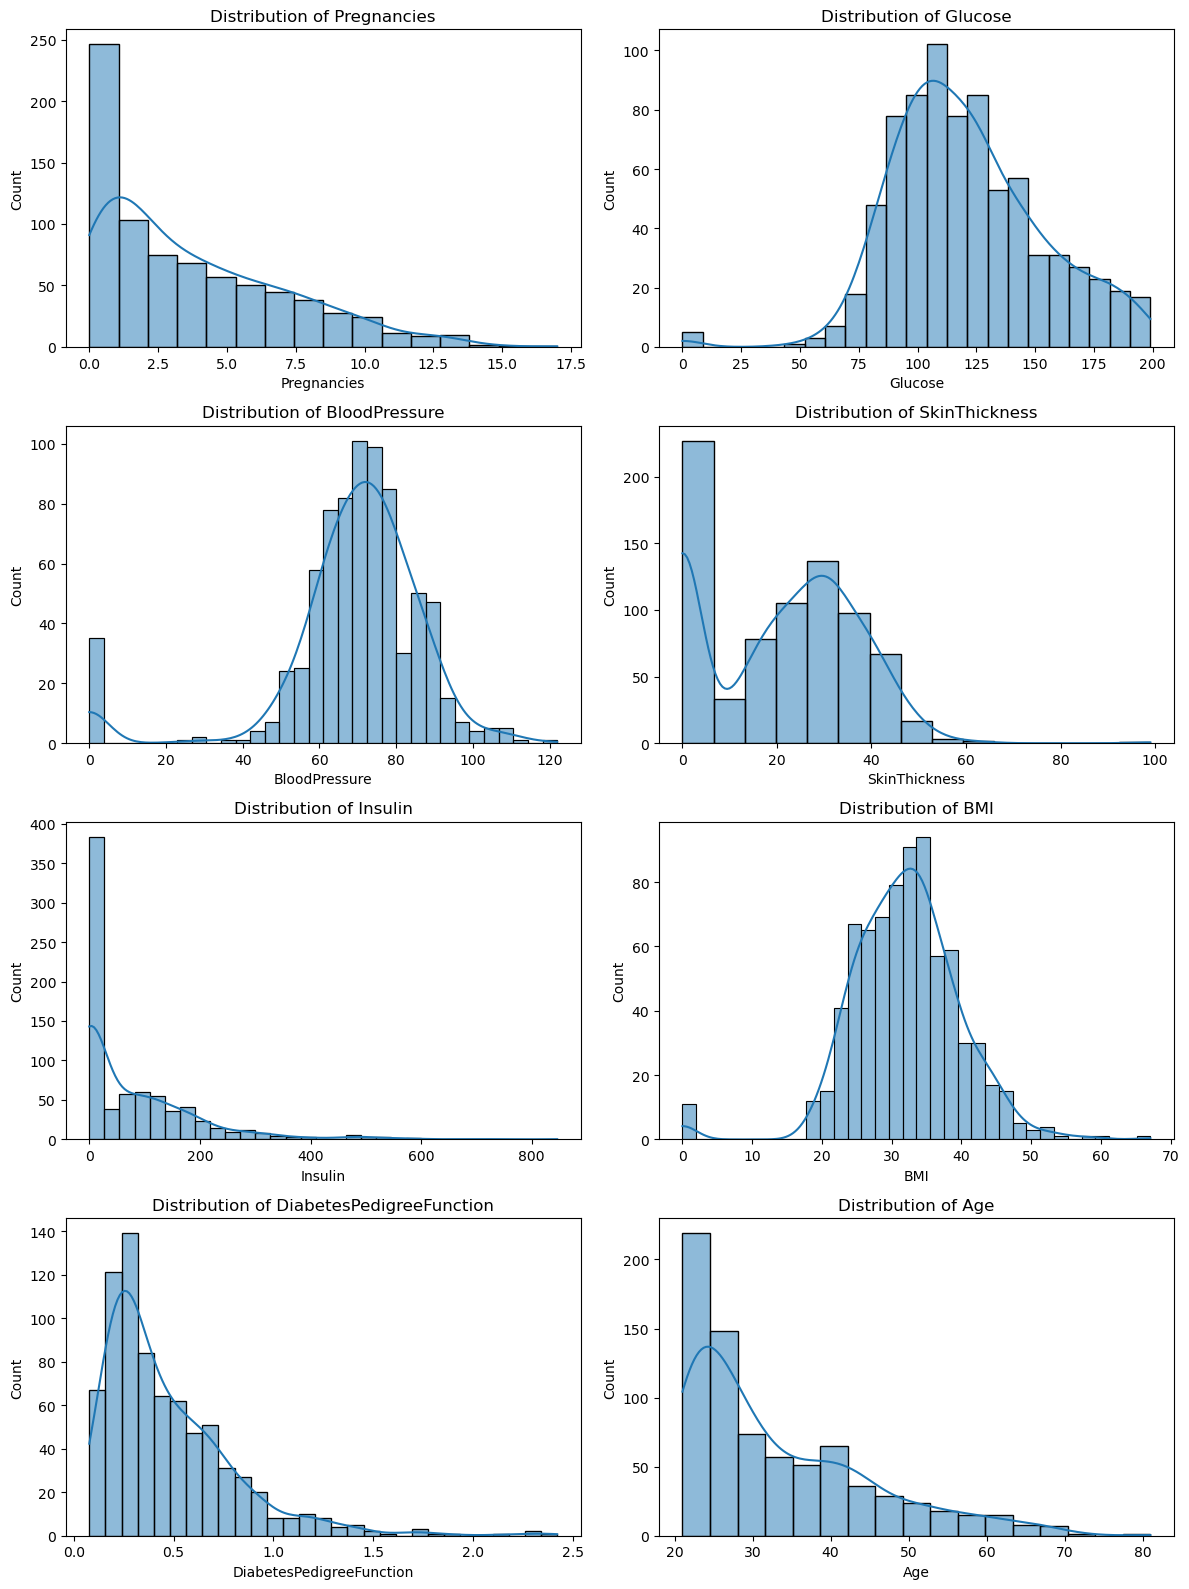

In [47]:
# What is the distribution of each predictor variable?

fig, axes = plt.subplots(4, 2, figsize=(12, 16))  # Adjust the figure size as needed

axes = axes.flatten()

for i, column in enumerate(df.columns[:-1]):
    plt.sca(axes[i])
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

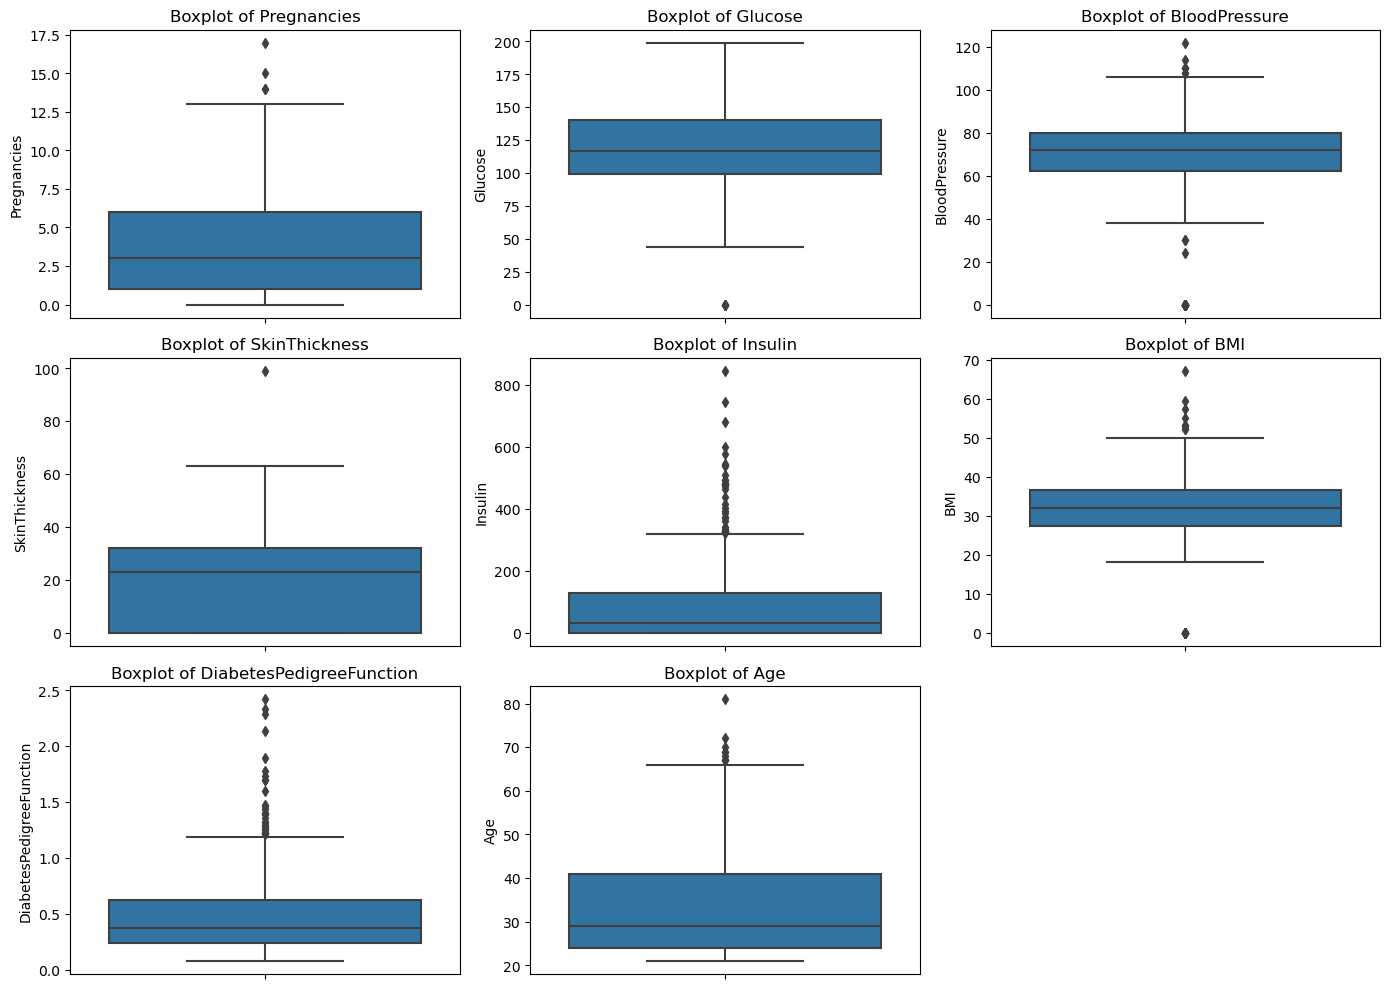

In [44]:
# Are there any outliers in the predictor variables?

plt.figure(figsize=(14, 10))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

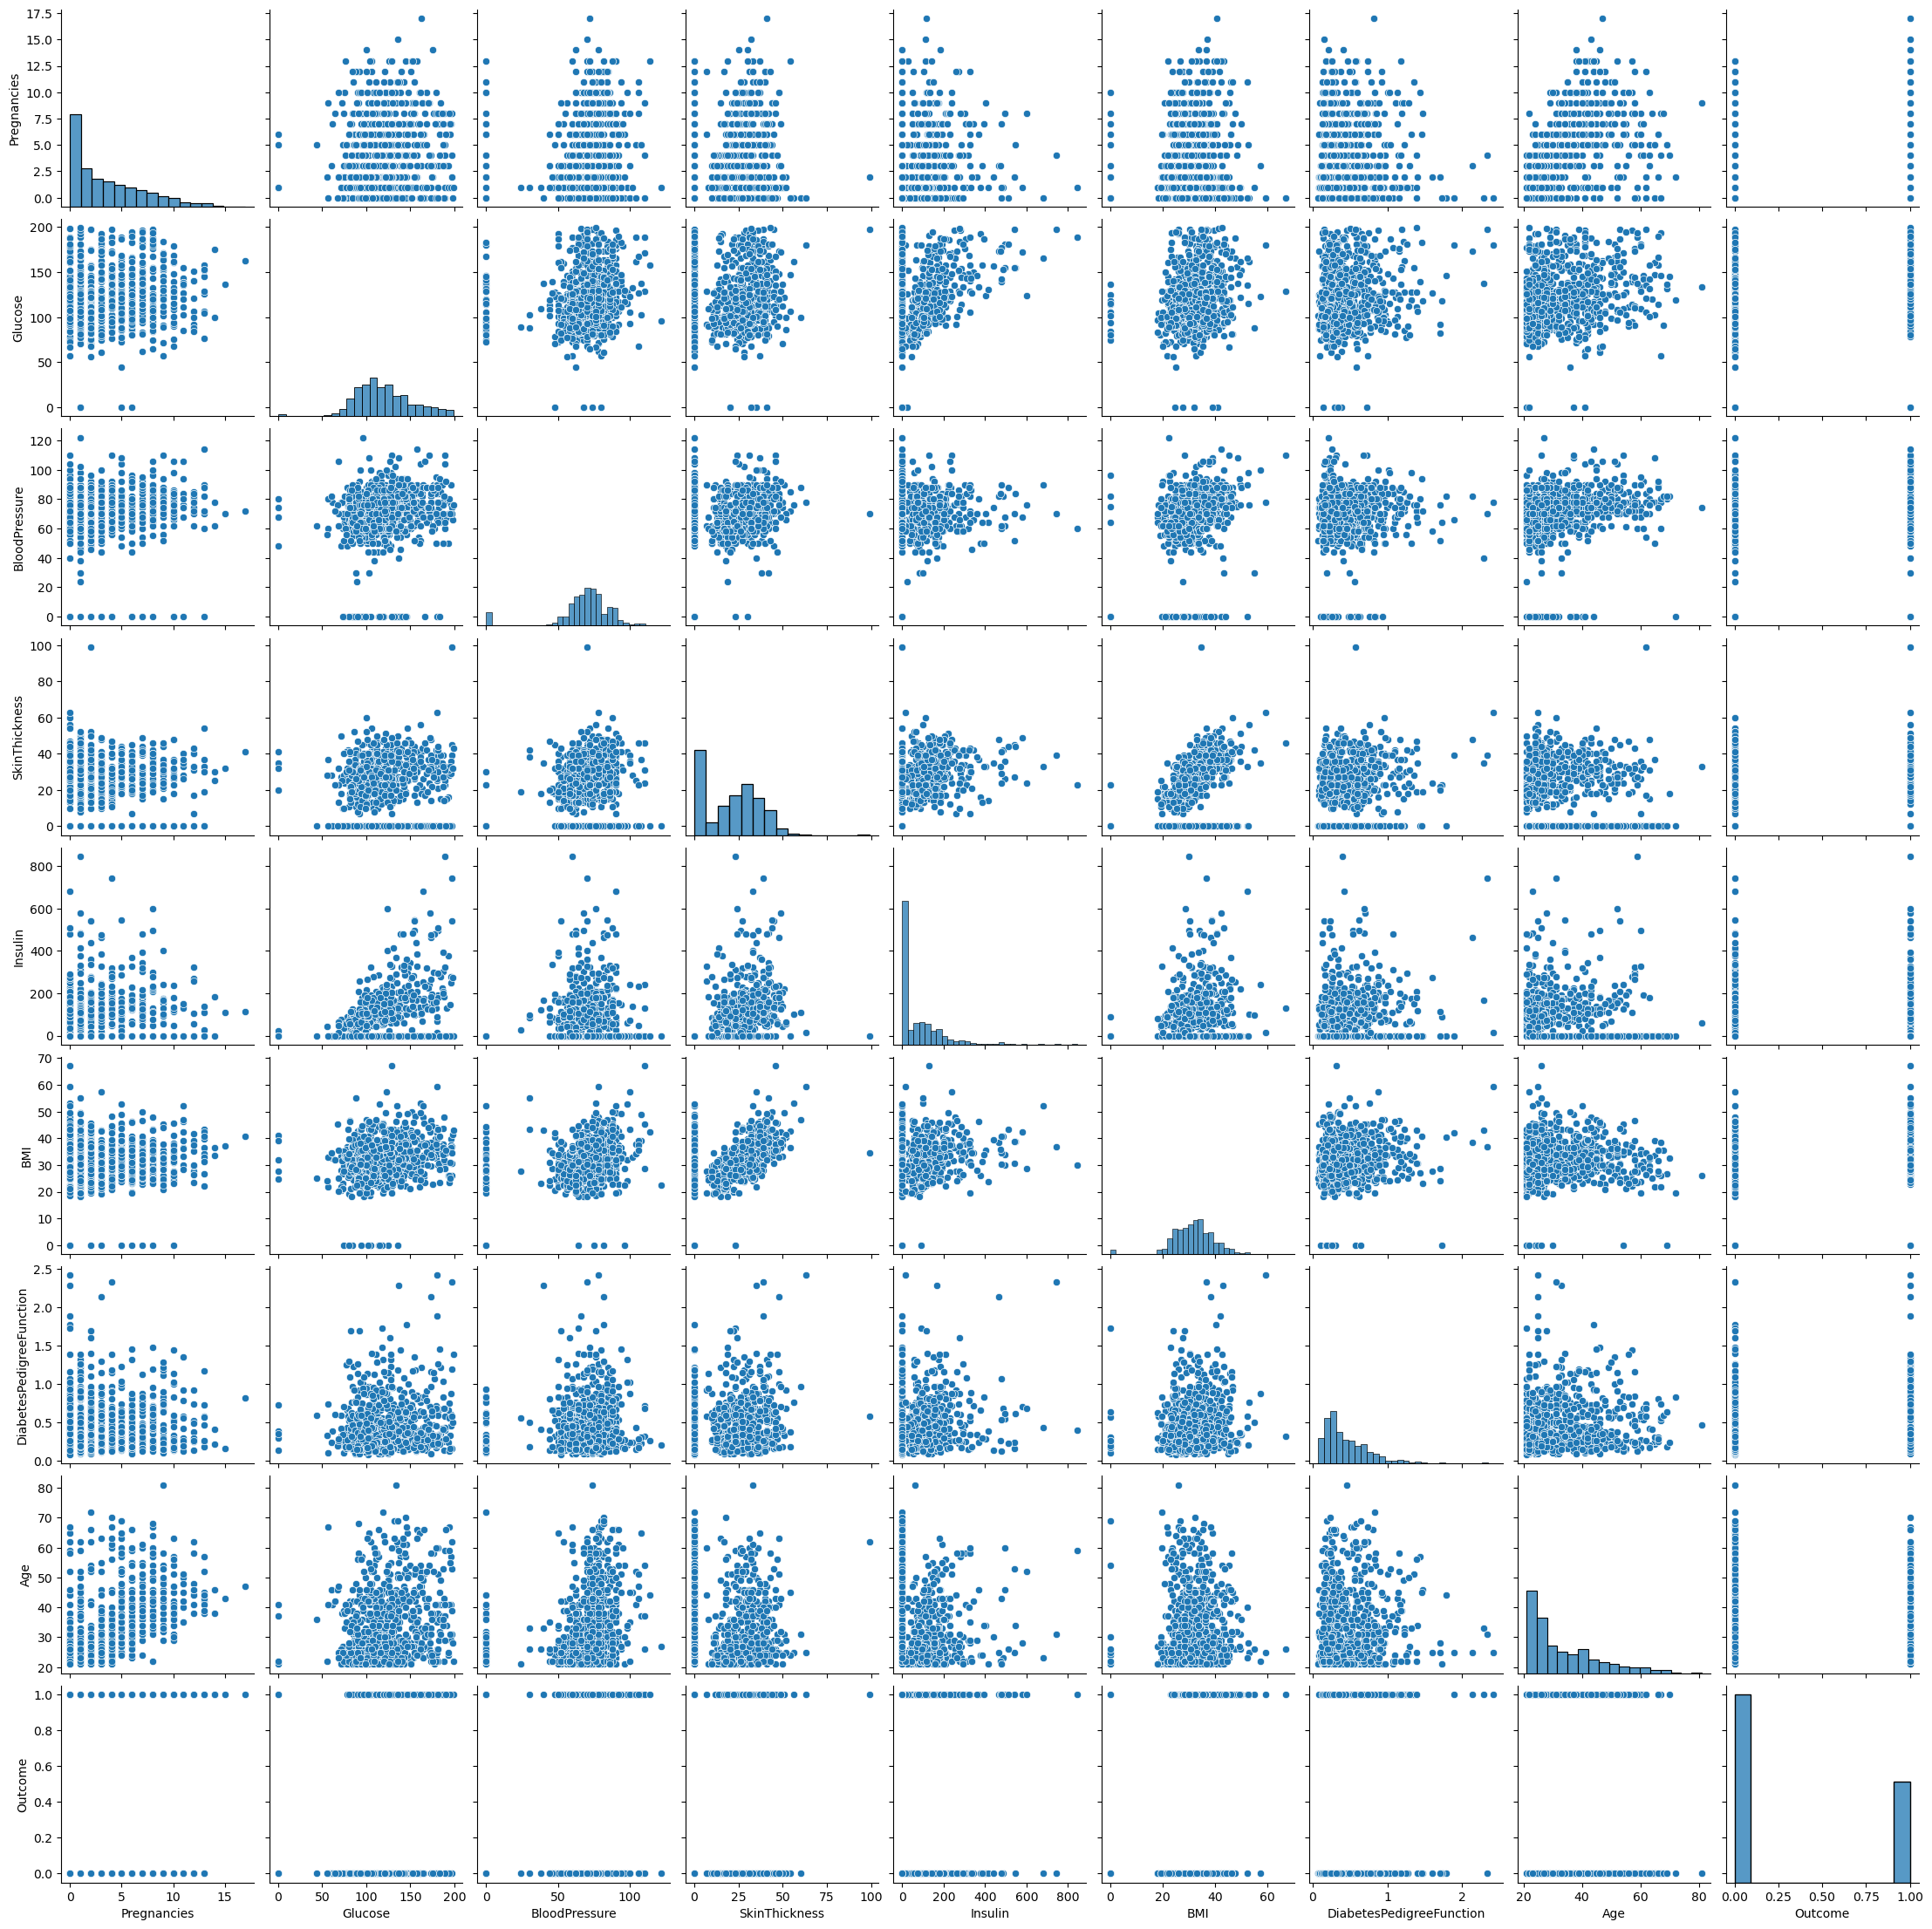

In [34]:
# How are the predictor variables related to each other?

# Is there any interaction effect between the predictor variables?

sns.pairplot(df)
plt.show()

In [16]:
# What is the average age of the individuals in the dataset?

average_age = df['Age'].mean()
print(f"Average Age: {average_age:.2f}")

Average Age: 33.24


In [22]:
# What is the average glucose level for individuals with diabetes and without diabetes?

average_glucose_diabetes = df.loc[df['Outcome'] == 1, 'Glucose'].mean()

average_glucose_no_diabetes = df.loc[df['Outcome'] == 0, 'Glucose'].mean()

print(f'Average Glucose for Diabetic: {average_glucose_diabetes:.2f}')

print(f'Average Glucose for Non-Diabetic: {average_glucose_no_diabetes:.2f}')

Average Glucose for Diabetic: 141.26
Average Glucose for Non-Diabetic: 109.98


In [23]:
# What is the average BMI for individuals with diabetes and without diabetes?

average_BMI_diabetes = df.loc[df['Outcome'] == 1, 'BMI'].mean()

average_BMI_no_diabetes = df.loc[df['Outcome'] == 0, 'BMI'].mean()

print(f'Average BMI for Diabetic: {average_BMI_diabetes:.2f}')

print(f'Average BMI for Non-Diabetic: {average_BMI_no_diabetes:.2f}')

Average BMI for Diabetic: 35.14
Average BMI for Non-Diabetic: 30.30


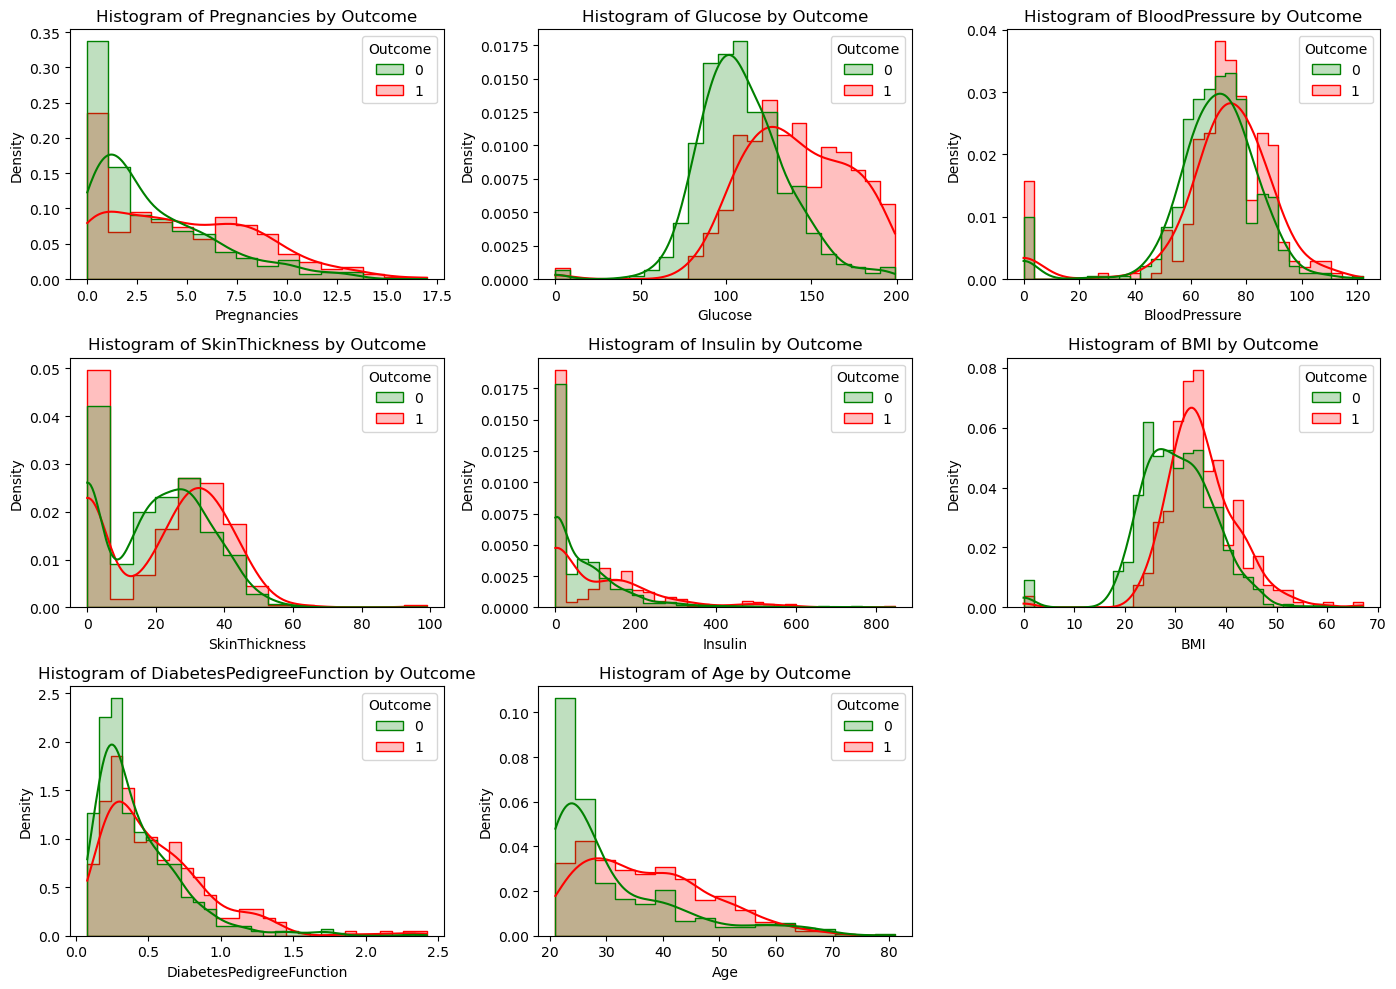

In [42]:
# How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?

plt.figure(figsize=(14, 10))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df, x=column, hue='Outcome', kde=True, element='step', stat='density', common_norm=False,
                 palette={0: 'green', 1: 'red'})
    plt.title(f'Histogram of {column} by Outcome')
    plt.xlabel(column)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

Most of the histograms for people with diabetes look to be skewed slightly to the right compared to the non-diabetic.

In [41]:
# Are there any differences in the predictor variables between males and females (if gender information is available)?

No Data Available

# Part II : Preprocessing & Feature Engineering

You need to perform preprocessing on the given dataset. Please consider the following tasks and carry out the necessary steps accordingly.
- Handling missing values
- Handling outliers
- Scaling and normalization
- Feature Engineering
- Handling imbalanced data

In [48]:
# Handling missing values

There are no nulls

In [78]:
# Handling outliers
# Create a copy

df2 = df
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


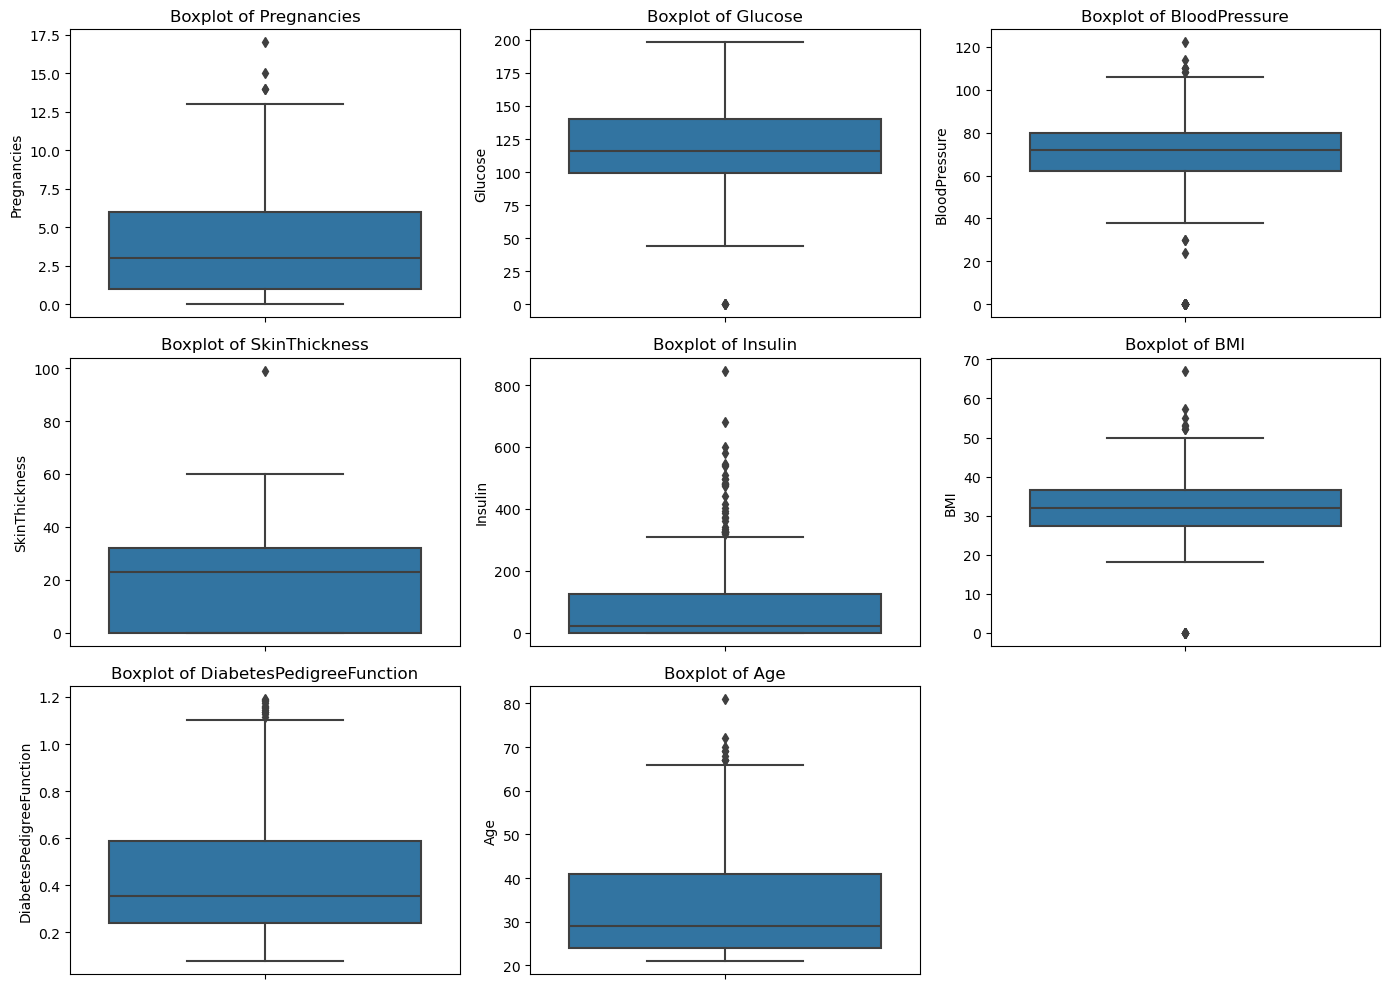

In [62]:
plt.figure(figsize=(14, 10))
for i, column in enumerate(df2.columns[:-1]):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df2[column])
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()


In [74]:
# As seen in the boxplots above, there are outliers in most of the features, and also some features as Glucose and SkinThickness, contain zero values. 
# I don't feel confident of removing outliers, but yes to remove invalid zeros:

columns_with_invalid_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

mask = (df2[columns_with_invalid_zeros] == 0).any(axis=1)

df2 = df2[~mask]

In [77]:
print(df2.shape)
print(df.shape)

(392, 9)
(768, 9)


If I removed the invalid zeros, I would lose half the data, so instead I will replace them by the median of each column: 

In [80]:
df3 = df

for column in columns_with_invalid_zeros:
    median_value = df3[column].median()
    df3[column] = df3[column].replace(0, median_value)

In [81]:
print(df3.shape)
print(df.shape)

(768, 9)
(768, 9)


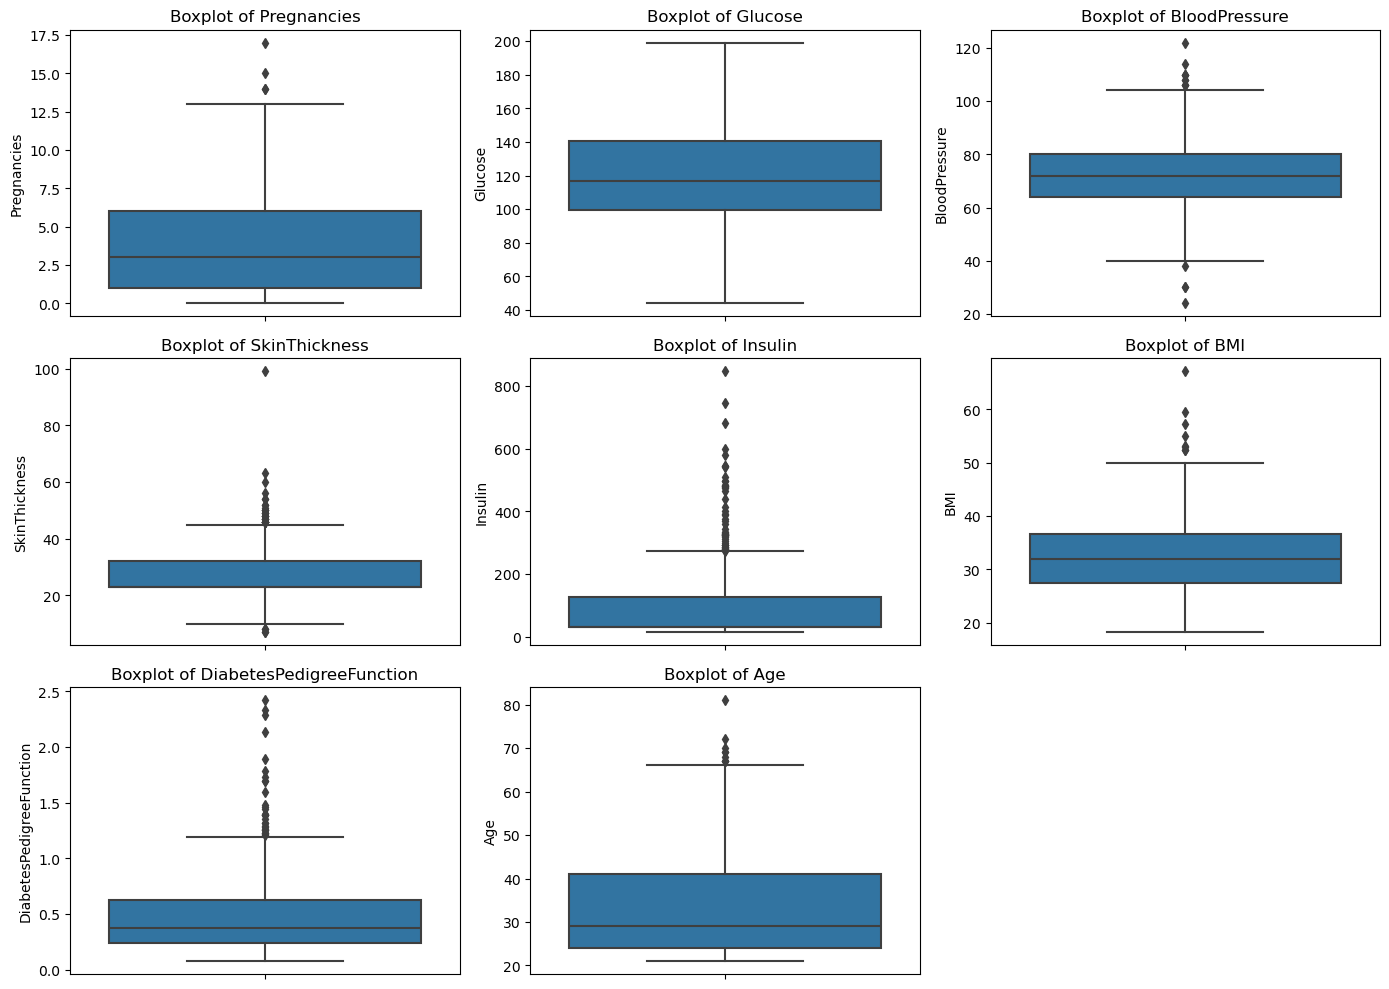

In [82]:
plt.figure(figsize=(14, 10))
for i, column in enumerate(df3.columns[:-1]):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df3[column])
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

No more invalid zeros.

In [88]:
# Scaling and normalization

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

y = df3['Outcome']

X = df3.drop(['Outcome'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10, stratify = y)


scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)


In [84]:
# Feature Engineering


None of the columns are neither categorical nor ordinal, so no feature engineering required. 

In [83]:
# Handling imbalanced data

df3['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

500 non-diabetic vs 268 diabetic, shows imbalance. 

By using 'stratify = y' in the 'train_test_split', I ensured that both, the train and the test sets have no significant difference in class distribution

# Part III : Training ML Model

For this task, you are required to build a machine learning model to predict the outcome variable. This will be a binary classification task, as the target variable is binary. You should select at least two models, one of which should be an ensemble model, and compare their performance.

- Train the models: Train the selected models on the training set.
- Model evaluation: Evaluate the trained models on the testing set using appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC.
- Model comparison: Compare the performance of the selected models and choose the best-performing model based on the evaluation metrics. You can also perform additional analysis, such as model tuning and cross-validation, to improve the model's performance.

##### Model 1: Logistic Regression

In [93]:
# Train the models: Train the selected models on the training set.

from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()

lr_model.fit(X_train, y_train)


LogisticRegression()

In [95]:
# Make predictions on the test set

y_pred = lr_model.predict(X_test)

y_proba = lr_model.predict_proba(X_test)[:, 1]

In [102]:
# Model evaluation: Evaluate the trained models on the testing set using appropriate evaluation metrics, such as accuracy, precision, recall,
# F1-score, and ROC-AUC.

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Now evaluating the model:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print("Logistic Regression Metrics:")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-Score: {f1:.3f}")
print(f"ROC-AUC: {roc_auc:.3f}")


Logistic Regression Metrics:
Accuracy: 0.818
Precision: 0.771
Recall: 0.685
F1-Score: 0.725
ROC-AUC: 0.851


##### Model 2: Random Forests

In [103]:
# Similar as with Logistic Regression

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)


rf.fit(X_train, y_train)


y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]


accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)


print("Random Forest Metrics:")
print(f"Accuracy: {accuracy_rf:.3f}")
print(f"Precision: {precision_rf:.3f}")
print(f"Recall: {recall_rf:.3f}")
print(f"F1-Score: {f1_rf:.3f}")
print(f"ROC-AUC: {roc_auc_rf:.3f}")


Random Forest Metrics:
Accuracy: 0.805
Precision: 0.714
Recall: 0.741
F1-Score: 0.727
ROC-AUC: 0.844


# Part IV : Conclusion

From the machine learning models developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

* The Logistic Regression model outperforms the Random Forest model in terms of accuracy and precision.

  
* The Random Forest model performs better in terms of recall.

  * 
Both models have similar F1-scorsd.

* In this context, my primary objective is to reduce the occurrence of false negatives since people's lives are on the line. Consequently, I would give preference to the Random Forest model due to its superior recall, emphasizing its ability to correctly identify individuals with diabetes and avoid missing positive cases.

#### Winner -> RANDOM FOREST!